In [7]:
import sys
sys.path.append('../scripts/')
from robot import*
from scipy.stats import norm,chi2 # norm:ガウス chi12:カイの二乗ぶんぷ

In [10]:
# 最適な粒子の数
def num(epsilon, delta, binnum):
    return math.ceil(chi2.ppf(1.0 - delta, binnum - 1) / (2 * epsilon)) # 端数は切り上げ

<IPython.core.display.Javascript object>


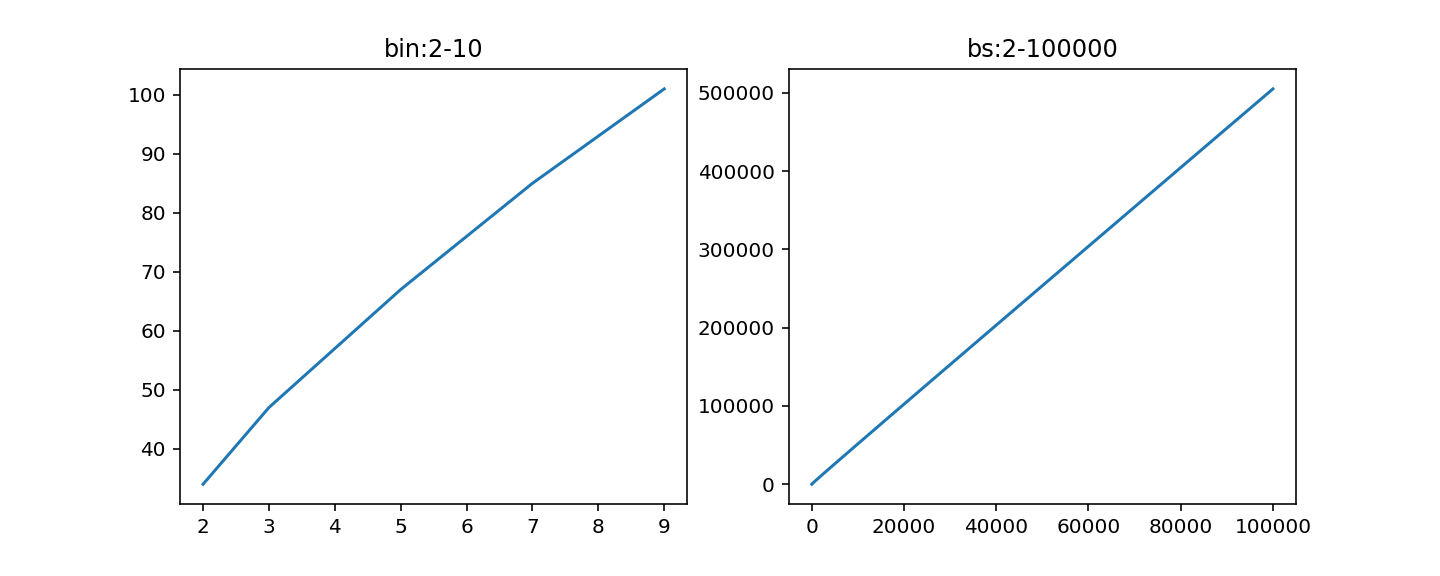

In [12]:
fig, (axl, axr) = plt.subplots(ncols = 2, figsize = (10,4))

bs = np.arange(2,10)
n = [num(0.1, 0.01, b) for b in bs] # ビンの数2~10
axl.set_title("bin:2-10")
axl.plot(bs,n)

bs = np.arange(2, 100000)
n = [num(0.1, 0.01, b) for b in bs] # ビンの数2~100000
axr.set_title("bs:2-100000")
axr.plot(bs,n)

plt.show()

In [19]:
def num_wh(epsilon, delta, binnum):
    dof = binnum - 1
    z = norm.pdf(1.0 - delta)
    return math.ceil(dof / (2 * epsilon) * (1.0 - 2.0 / (9 * dof) + math.sqrt(2.0 / (9 * dof)) * z) ** 3)

In [20]:
for binnum in 2,4,8,1000,10000,100000:
    print("bin:", binnum, "ε = 0.1,δ = 0.01", num(0.1, 0.01, binnum), num_wh(0.1, 0.01, binnum))
    print("bin:", binnum, "ε = 0.5,δ = 0.01", num(0.5, 0.01, binnum), num_wh(0.5, 0.01, binnum))    
    print("bin:", binnum, "ε = 0.5,δ = 0.01", num(0.5, 0.05, binnum), num_wh(0.5, 0.05, binnum))    

bin: 2 ε = 0.1,δ = 0.01 34 4
bin: 2 ε = 0.5,δ = 0.01 7 1
bin: 2 ε = 0.5,δ = 0.01 4 1
bin: 4 ε = 0.1,δ = 0.01 57 15
bin: 4 ε = 0.5,δ = 0.01 12 3
bin: 4 ε = 0.5,δ = 0.01 8 3
bin: 8 ε = 0.1,δ = 0.01 93 37
bin: 8 ε = 0.5,δ = 0.01 19 8
bin: 8 ε = 0.5,δ = 0.01 15 8
bin: 1000 ε = 0.1,δ = 0.01 5530 5047
bin: 1000 ε = 0.5,δ = 0.01 1106 1010
bin: 1000 ε = 0.5,δ = 0.01 1074 1010
bin: 10000 ε = 0.1,δ = 0.01 51655 50165
bin: 10000 ε = 0.5,δ = 0.01 10331 10033
bin: 10000 ε = 0.5,δ = 0.01 10233 10035
bin: 100000 ε = 0.1,δ = 0.01 505212 500539
bin: 100000 ε = 0.5,δ = 0.01 101043 100108
bin: 100000 ε = 0.5,δ = 0.01 100736 100112
